In [1]:
''' Imports '''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import gizmo_analysis as gizmo
import utilities as ut
import time as t
import gc
from astropy.stats import histogram
import sys

In [2]:
### LOADING AND READING IN THE SIMULATION (FIRST SNAPSHOT) ###

#simname = '/scratch/04712/tg840119/m12i_m7e3_HD_fire3_fireBH_Sep052021_hr_crdiffc690_sdp1e10_gacc31_fa0.5'                                                         
#simdir = '/scratch/04712/tg840119/m12i_m7e3_HD_fire3_fireBH_Sep052021_hr_crdiffc690_sdp1e10_gacc31_fa0.5'

#part = gizmo.io.Read.read_snapshots(['star','gas'],'index', 200 , simulation_name=simname, simulation_directory=simdir, assign_hosts_rotation=True, assign_hosts=True)

In [3]:
outpath = '/work2/08006/dbenton/stampede3/allgas/quarter_z/'

In [4]:
t1 = t.time()

diffuse = np.loadtxt(outpath + 'diffuse475_501.txt')


dense = np.loadtxt(outpath + 'dense475_501.txt')

t2 = t.time()
print(t2 - t1)

28.37689447402954


In [7]:
min = np.min(np.array(np.min(dense),np.min(diffuse)))
max = np.max(np.array(np.max(dense),np.max(diffuse)))
print(min)
print(max)


print(len(diffuse))
print(len(dense))


bin_edges = np.geomspace(min, max, 31)


counts, bins = histogram(dense, bins = bin_edges)
diff_counts, bins = histogram(diffuse, bins = bin_edges)


frac_counts = counts/(counts+diff_counts)
print(frac_counts)

binwidth = bin_edges[1] - bin_edges[0]
bin_middles = bin_edges[0:-1] + binwidth/2.


4.874617961884986e-13
1013.5751953125
61005307
1222959
[1.22249389e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.22204167e-05
 2.91896881e-02 3.17898593e-01 5.03737692e-01 6.11374874e-01
 7.27347878e-01 8.09809520e-01 8.45096694e-01 8.69454867e-01
 8.80448668e-01 8.83348930e-01 8.84047330e-01 8.41562670e-01
 7.42826780e-01 7.05882353e-01]


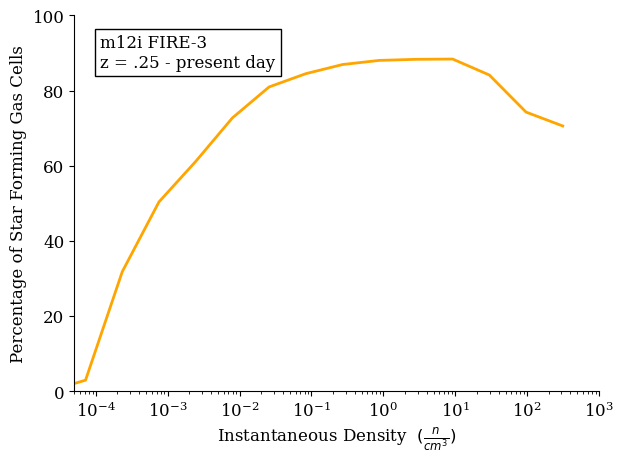

In [11]:
fig, ax = plt.subplots()

ax.plot(bin_middles, (frac_counts*100.0), label='all gas', color='orange', linewidth = 2)

#snap 200 is 6.432 Gyr
#snap 250 is 8.319 Gyr
#snap 300 is 10.171 Gyr
ax.set_xlabel(r'Instantaneous Density $\ (\frac{n}{cm^{3}})$')
ax.set_ylabel('Percentage of Star Forming Gas Cells')

ax.set_xlim(5e-5, max)
ax.set_ylim(0, 100)
ax.set_xscale('log')


#ax.legend(loc='upper left')

# Customize tick labels
#ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi / 2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val/np.pi)}π'))

# Customize fonts and font sizes
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

# Customize the plot background and frame
#ax.set_facecolor('lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add text box
plt.text(0.05, 0.95, 'm12i FIRE-3\nz = .25 - present day', transform=ax.transAxes, verticalalignment='top', bbox=dict(facecolor='white'))
#top left = 0.05, 0.95
#bottom right = 0.65, 0.25



# Save the plot to a file (optional)
#plt.savefig(outpath + 'D_D_feh_disk',bbox_inches='tight')
plt.tight_layout()
# Display the plot
plt.show()

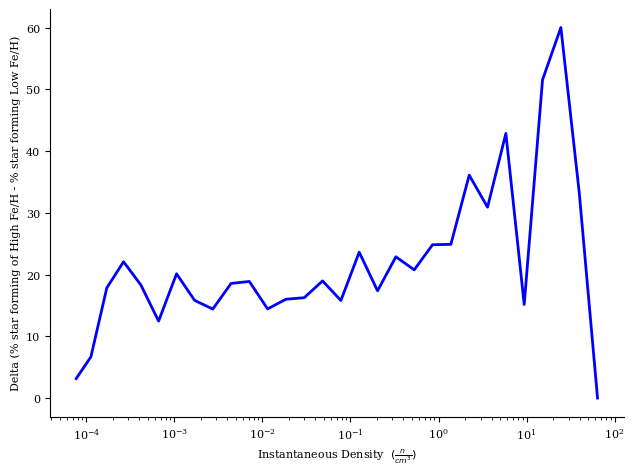

In [18]:
delta = frac_counts_high_feh - frac_counts_low_feh

fig, ax = plt.subplots()

ax.plot(bin_middles_low_feh, (delta*100), color='blue', linewidth = 2)
#ax.plot(bin_middles_high_feh, (delta*100), color='red', linewidth = 2)


#snap 200 is 6.432 Gyr
#snap 250 is 8.319 Gyr
#snap 300 is 10.171 Gyr
ax.set_xlabel(r'Instantaneous Density $\ (\frac{n}{cm^{3}})$')
ax.set_ylabel('Delta (% star forming of High Fe/H - % star forming Low Fe/H)')

#ax.set_xlim(5e-5, max_)
#ax.set_ylim(0, 100)
ax.set_xscale('log')


#ax.legend(loc='upper left')

# Customize tick labels
#ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi / 2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val/np.pi)}π'))

# Customize fonts and font sizes
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 8

# Customize the plot background and frame
#ax.set_facecolor('lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add text box
#plt.text(0.65, 0.25, 'm12i FIRE-3 disk\nFe/H ≥ -0.5 (dex)\nz = .5 - present day', transform=ax.transAxes, verticalalignment='top', bbox=dict(facecolor='white'))
#plt.text(0.05, 0.95, 'm12i FIRE-3 disk\nFe/H < -0.5 (dex)\nz = .5 - present day', transform=ax.transAxes,verticalalignment='top', bbox=dict(facecolor='white'))
#top left = 0.05, 0.95

# Save the plot to a file (optional)
#plt.savefig(outpath + 'delta_D_D_feh_low_feh_bins',bbox_inches='tight')
plt.tight_layout()
# Display the plot
plt.show()

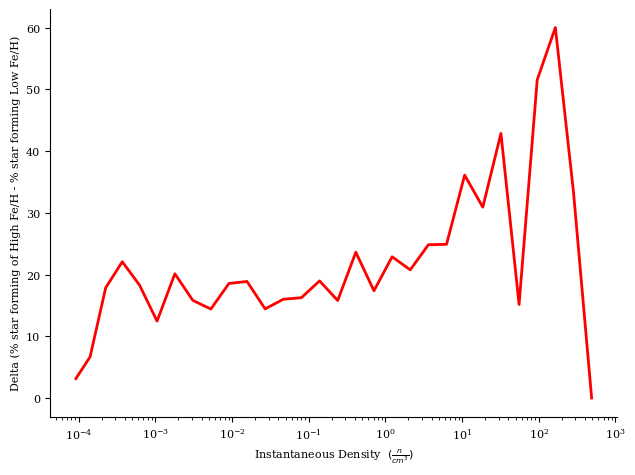

In [19]:
delta = frac_counts_high_feh - frac_counts_low_feh

fig, ax = plt.subplots()

#ax.plot(bin_middles_low_feh, (delta*100), color='blue', linewidth = 2)
ax.plot(bin_middles_high_feh, (delta*100), color='red', linewidth = 2)


#snap 200 is 6.432 Gyr
#snap 250 is 8.319 Gyr
#snap 300 is 10.171 Gyr
ax.set_xlabel(r'Instantaneous Density $\ (\frac{n}{cm^{3}})$')
ax.set_ylabel('Delta (% star forming of High Fe/H - % star forming Low Fe/H)')

#ax.set_xlim(5e-5, max_)
#ax.set_ylim(0, 100)
ax.set_xscale('log')


#ax.legend(loc='upper left')

# Customize tick labels
#ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi / 2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val/np.pi)}π'))

# Customize fonts and font sizes
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 8

# Customize the plot background and frame
#ax.set_facecolor('lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the plot to a file (optional)
#plt.savefig(outpath + 'delta_D_D_feh_high_feh_bins',bbox_inches='tight')
plt.tight_layout()
# Display the plot
plt.show()

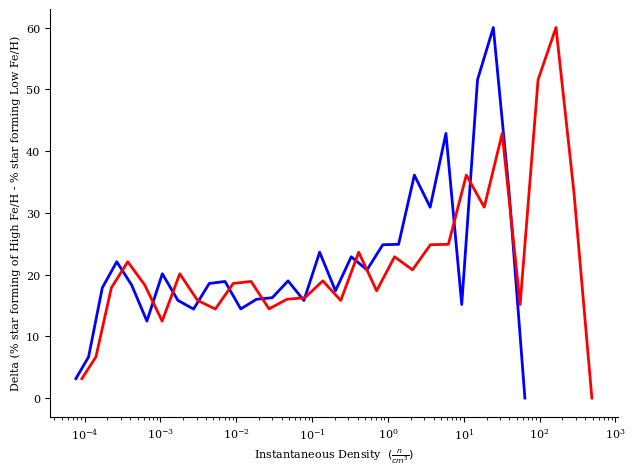

In [20]:
delta = frac_counts_high_feh - frac_counts_low_feh

fig, ax = plt.subplots()

ax.plot(bin_middles_low_feh, (delta*100), color='blue', linewidth = 2)
ax.plot(bin_middles_high_feh, (delta*100), color='red', linewidth = 2)


#snap 200 is 6.432 Gyr
#snap 250 is 8.319 Gyr
#snap 300 is 10.171 Gyr
ax.set_xlabel(r'Instantaneous Density $\ (\frac{n}{cm^{3}})$')
ax.set_ylabel('Delta (% star forming of High Fe/H - % star forming Low Fe/H)')

#ax.set_xlim(5e-5, max_)
#ax.set_ylim(0, 100)
ax.set_xscale('log')


#ax.legend(loc='upper left')

# Customize tick labels
#ax.xaxis.set_major_locator(plt.MultipleLocator(base=np.pi / 2))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda val, pos: f'{int(val/np.pi)}π'))

# Customize fonts and font sizes
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 8

# Customize the plot background and frame
#ax.set_facecolor('lightgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the plot to a file (optional)
#plt.savefig(outpath + 'delta_D_D_feh_both_feh_bins',bbox_inches='tight')
plt.tight_layout()
# Display the plot
plt.show()